<a href="https://colab.research.google.com/github/irsyaddani/PCVK_2024_17/blob/main/Week5_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Irsyad Danisaputra
<br> NIM: 2241720233
<br> Kelas: TI-3E
<br> Absen: 17

1. Buat Gamma Correction sesuai dengan petunjuk berikut:

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

In [1]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


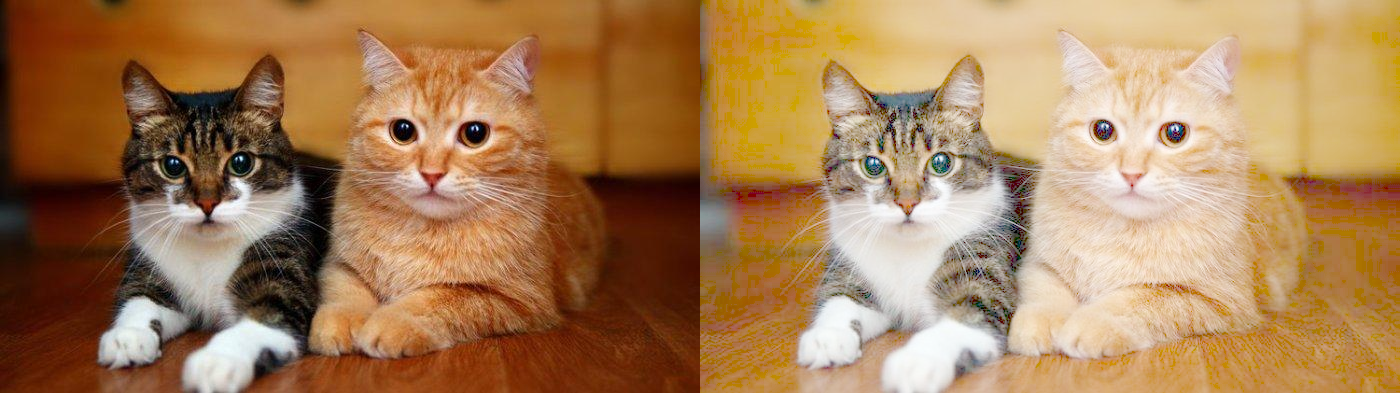

In [6]:
original_img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester5/PCVK/Modul5/kucing.jpg')

def gamma_correction(image, gamma):
  invGamma = 1.0/gamma
  table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
  return cv2.LUT(image, table)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

gamma_img = gamma_correction(original_img, gamma)

cv2_imshow(cv2.hconcat([original_img, gamma_img]))

2. Buat Simulasi Image Depth:

  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

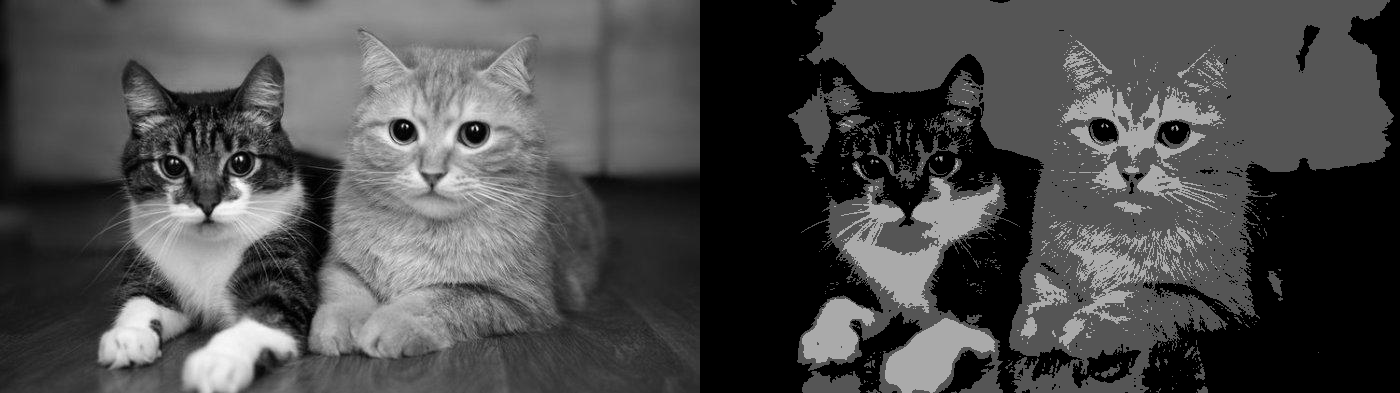

In [7]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
gray_image = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
depth_image = np.zeros(gray_image.shape, gray_image.dtype)
depth_image = (np.floor(gray_image / level) * level).astype('uint8')
cv2_imshow(cv2.hconcat([gray_image, depth_image]))

3. Buat modul Average Denoising
  
  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg. Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).

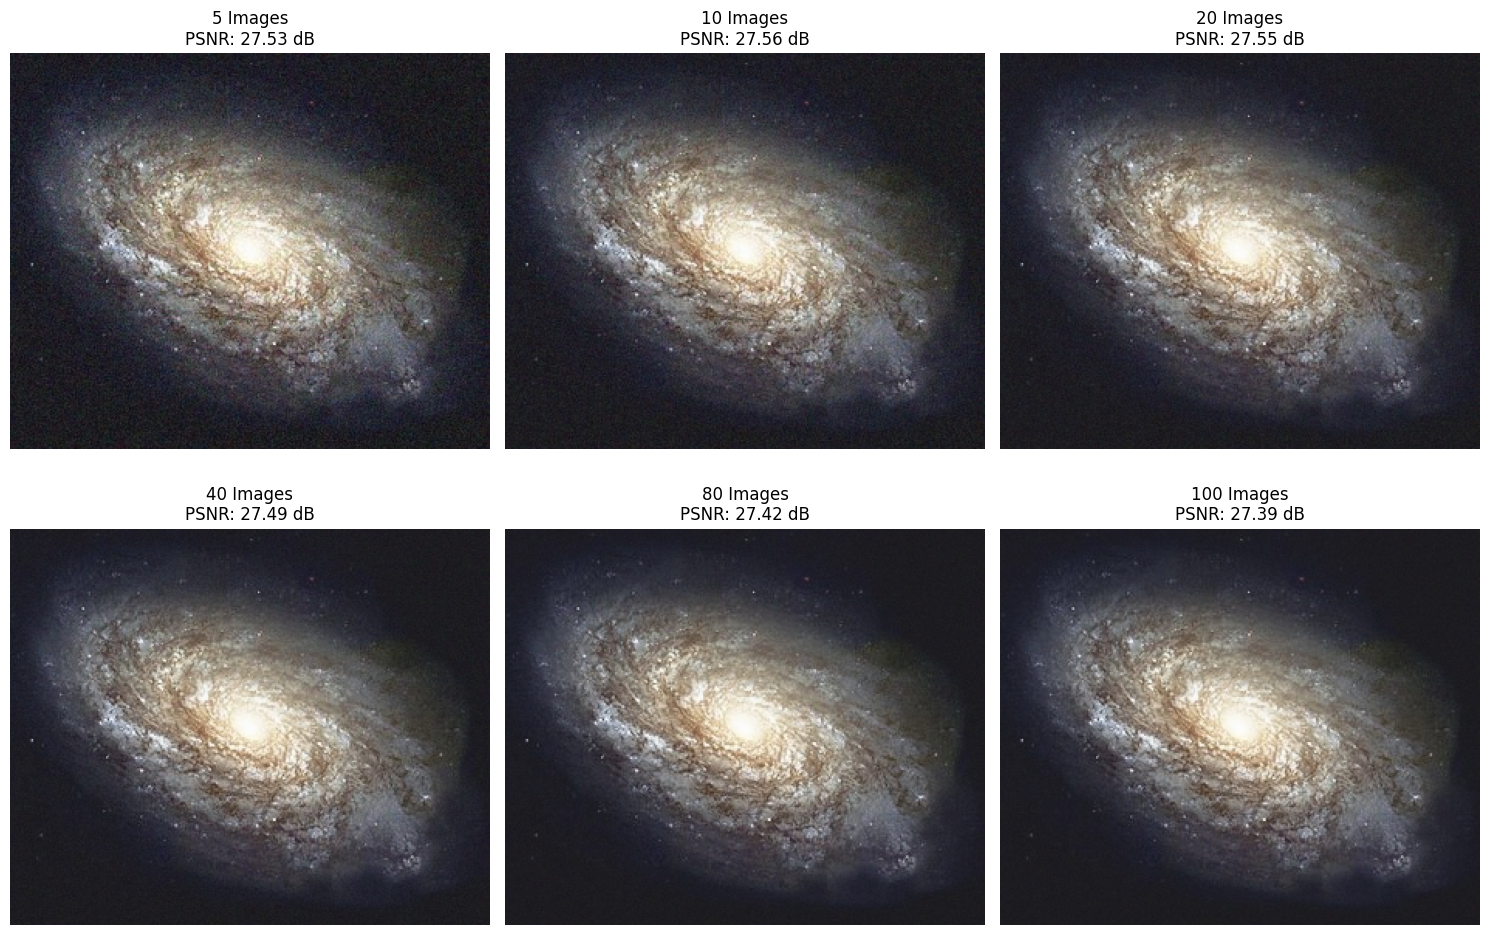

In [9]:
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt


original_img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester5/PCVK/Modul5/Assets/galaxy.jpg')


# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Kuliah/Semester5/PCVK/Modul5/Assets/noises/*.jpg'):
 n= cv2.imread(img)

 cv_img.append(n)

 rows = 2
cols = 3

test_images_counts = [5, 10, 20, 40, 80, 100]
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

for index, num_images in enumerate(test_images_counts):
    average_img = np.zeros(cv_img[0].shape, np.float32)

    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv2.convertScaleAbs(denoised_img)

    psnr_value = PSNR(original_img, denoised_img)

    row = index // cols
    col = index % cols

    axs[row, col].imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nPSNR: {psnr_value:.2f} dB')
    axs[row, col].axis('off')

for idx in range(len(test_images_counts), rows * cols):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


4. Buat image masking untuk image berikut.

  Image kiri adalah image asli (image KTP), sedangkan image paling kanan adalah hasilnya:

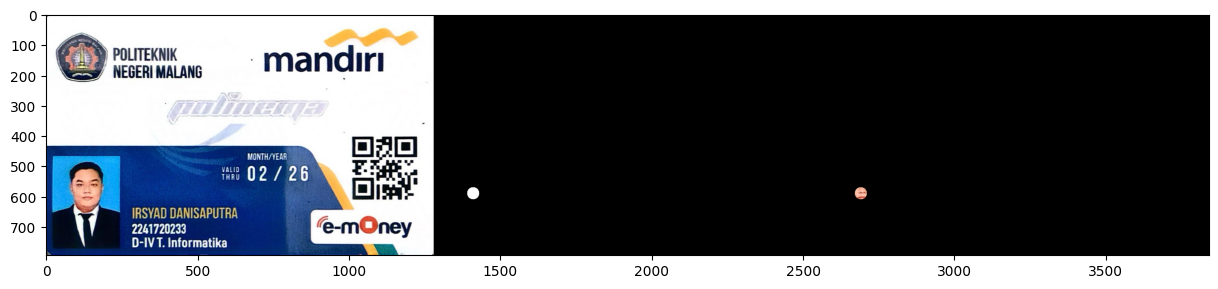

In [28]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image
path = '/content/drive/MyDrive/Kuliah/Semester5/PCVK/Modul5/KTM_Irsyad.jpg'
KTM = cv2.imread(path)
KTM_rgb = cv2.cvtColor(KTM, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
mask = np.zeros_like(KTM)

# Define the circle parameters
center1 = (130, 590)
radius1 = 20

# Draw the circle on the mask
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)

# Apply the mask using bitwise AND
masked_image = cv2.bitwise_and(KTM, mask)

# Convert mask and masked_image to RGB for displaying with matplotlib
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Concatenate the original, mask, and masked images horizontally
concatenated_image = np.hstack((KTM_rgb, mask_rgb, masked_image_rgb))

# Display the final result using matplotlib
plt.figure(figsize=(15, 5))
plt.imshow(concatenated_image)
# plt.axis('off')
plt.show()


In [29]:
!jupyter nbconvert --to html /content/Week5_17.ipynb

[NbConvertApp] Converting notebook /content/Week5_17.ipynb to html
[NbConvertApp] Writing 4600509 bytes to /content/Week5_17.html
